Import Lib

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


In [37]:
import pandas as pd
import os

path = "D:/Project/Different Dataset and Regression Model/Gas_Turbine_Regression/"
files = [f for f in os.listdir(path) if f.endswith('.xls') or f.endswith('.xlsx')]

# Preview column names of each file
for file in files:
    full_path = os.path.join(path, file)
    df_temp = pd.read_excel(full_path)
    print(f"📄 {file} → Columns: {df_temp.columns.tolist()}")


In [38]:
print("📁 Files found:", files)


📁 Files found: []


In [39]:
path = r"D:\Project\Different Dataset and Regression Model\Gas_Turbine_Regression"


In [40]:
import os

# Correct path format
path = r"D:\Project\Different Dataset and Regression Model\Gas_Turbine_Regression"

# Look for .xls or .xlsx files
files = [f for f in os.listdir(path) if f.lower().endswith(('.xls', '.xlsx'))]

print("📁 Files found:", files)


📁 Files found: []


In [41]:
print("📂 Contents of the folder:")
print(os.listdir(path))


📂 Contents of the folder:
['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv', 'gt_2015.csv']


In [42]:
import pandas as pd
import os

# Correct path
path = r"D:\Project\Different Dataset and Regression Model\Gas_Turbine_Regression"

# Get all CSV files
files = [f for f in os.listdir(path) if f.lower().endswith('.csv')]

# Optional: Check column consistency before merging
column_sets = [set(pd.read_csv(os.path.join(path, f)).columns) for f in files]
base_cols = column_sets[0].intersection(*column_sets[1:])

# Read and merge using common columns
dataframes = []
for file in files:
    df_temp = pd.read_csv(os.path.join(path, file))
    df_temp = df_temp[list(base_cols)]
    dataframes.append(df_temp)

# Combine all data
df = pd.concat(dataframes, ignore_index=True)




Load And Merge All 5 Files

In [43]:
path = "D:/Project/Different Dataset and Regression Model/Gas_Turbine_Regression/"
files = ['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv', 'gt_2015.csv']

# Read and combine
dataframes = [pd.read_csv(path + file) for file in files]
df = pd.concat(dataframes, ignore_index=True)

print("✅ Combined Shape:", df.shape)
df.head()


✅ Combined Shape: (36733, 11)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


Clean And Explore The Code

In [44]:
df.info()
df.describe()
df.isnull().sum()  # Check for missing values
df = df.dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


Co-relation Heat Map

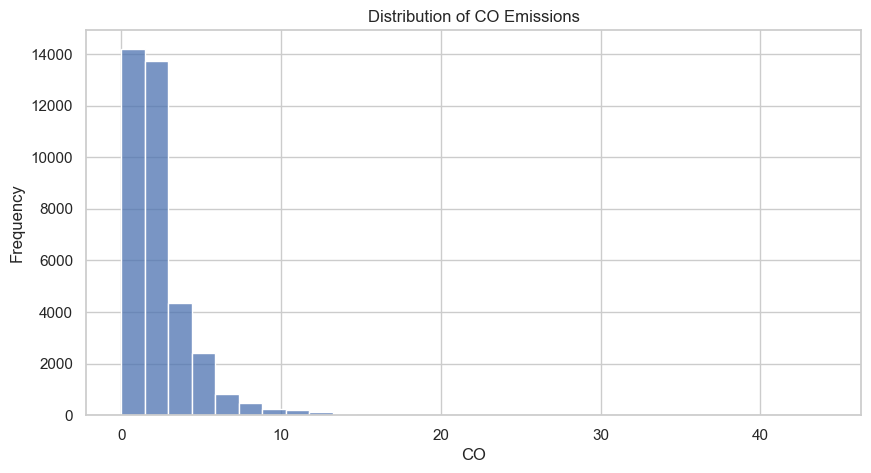

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example plot
plt.figure(figsize=(10, 5))
sns.histplot(df['CO'], bins=30)
plt.title("Distribution of CO Emissions")
plt.xlabel("CO")
plt.ylabel("Frequency")
plt.show()



Prepare Data for Regression
We’ll build 2 models:
Predict CO, Predict NOx
Feature/Target Split

In [46]:
X = df.drop(columns=["CO", "NOX"])  # Features
y_co = df["CO"]                     # Target 1
y_nox = df["NOX"]                   # Target 2


Linear Regression for CO
Train & Predict CO

In [47]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



X_train, X_test, y_train, y_test = train_test_split(X, y_co, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("📘 CO Prediction – Linear Regression")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


📘 CO Prediction – Linear Regression
R² Score: 0.55664600701646
RMSE: 1.5526744765288574


Visualize Actual vs Predicted CO

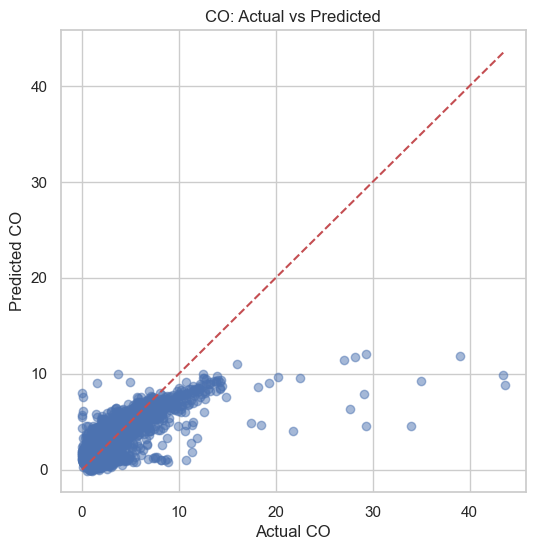

In [48]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual CO")
plt.ylabel("Predicted CO")
plt.title("CO: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Random Forest for NOX
Train & Predict NOX

In [49]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y_nox, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("🌳 NOx Prediction – Random Forest")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


🌳 NOx Prediction – Random Forest
R² Score: 0.8765521656531002
RMSE: 4.0446001989897455


Visualize Actual vs Predicted NOX

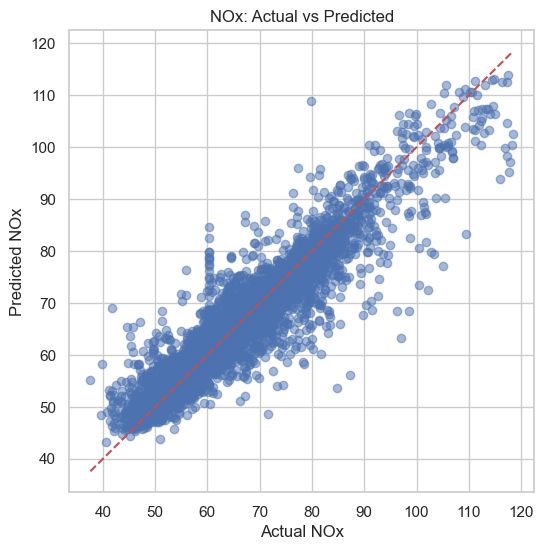

In [50]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual NOx")
plt.ylabel("Predicted NOx")
plt.title("NOx: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


### Observations

- Linear Regression gives a baseline for predicting CO.
- Random Forest gives better results for NOx with higher R².
- Scatter plots show how predictions align with actual values.
